In [26]:
#Importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
import warnings

In [27]:
#Ignoring warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading the dataset
df=pd.read_csv("/content/drive/MyDrive/Dataset/Pulsar.csv")
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [29]:
#Dropping duplicate entries if any
df.drop_duplicates(inplace=True)

In [30]:
#Checking whether the dataset has any null values.
df.isna().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [31]:
# Understanding the datatypes of the columns.
df.dtypes

Mean_Integrated         float64
SD                      float64
EK                      float64
Skewness                float64
Mean_DMSNR_Curve        float64
SD_DMSNR_Curve          float64
EK_DMSNR_Curve          float64
Skewness_DMSNR_Curve    float64
Class                     int64
dtype: object

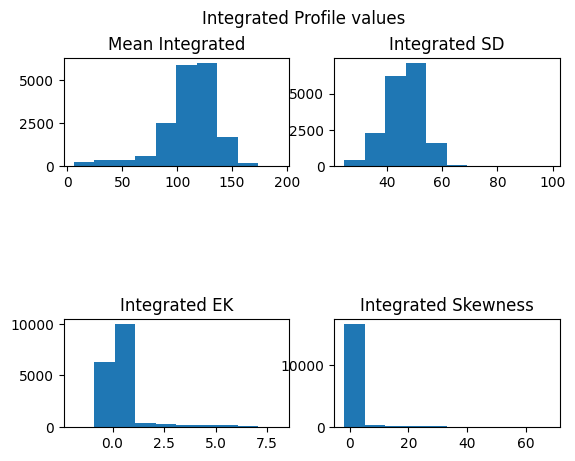

In [32]:
#Visualizing the values of the Integrated Profile
plt.subplot(3,2,1)
plt.title("Mean Integrated")
plt.hist(x=df["Mean_Integrated"])
plt.subplot(3,2,2)
plt.title("Integrated SD")
plt.hist(x=df["SD"])
plt.subplot(3,2,5)
plt.title("Integrated EK")
plt.hist(x=df["EK"])
plt.subplot(3,2,6)
plt.title("Integrated Skewness")
plt.hist(x=df["Skewness"])
plt.suptitle("Integrated Profile values")

plt.show()


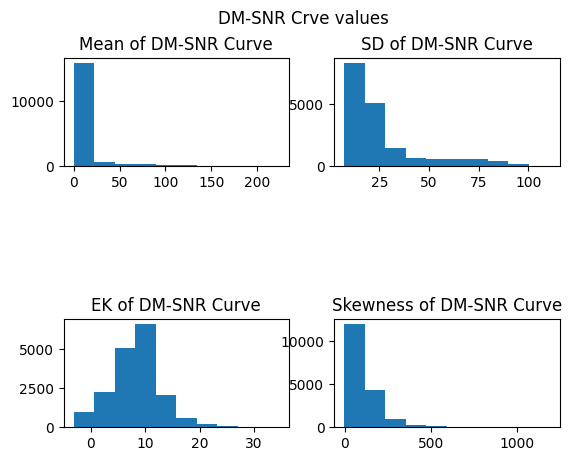

In [33]:
#Visualizing the values of the DM-SNR Curve
plt.subplot(3,2,1)
plt.title("Mean of DM-SNR Curve")
plt.hist(x=df["Mean_DMSNR_Curve"])
plt.subplot(3,2,2)
plt.title("SD of DM-SNR Curve")
plt.hist(x=df["SD_DMSNR_Curve"])
plt.subplot(3,2,5)
plt.title("EK of DM-SNR Curve")
plt.hist(x=df["EK_DMSNR_Curve"])
plt.subplot(3,2,6)
plt.title("Skewness of DM-SNR Curve")
plt.hist(x=df["Skewness_DMSNR_Curve"])
plt.suptitle("DM-SNR Crve values")
plt.show()

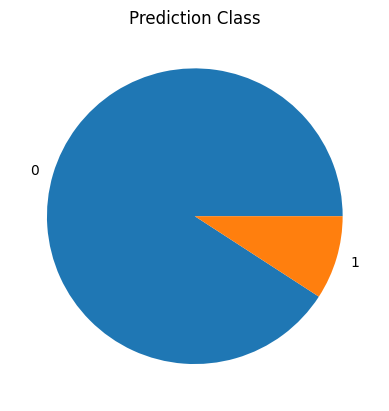

In [34]:
#Visualizing the values of 'Class' to determine the imbalancy of the dataset.
plt.title("Prediction Class")
plt.pie(df["Class"].value_counts(),labels=["0","1"])
plt.show()


It is clear that the dataset is highly imbalanced in which 0, corresponding to 'Negative', occurs the most.

<Axes: >

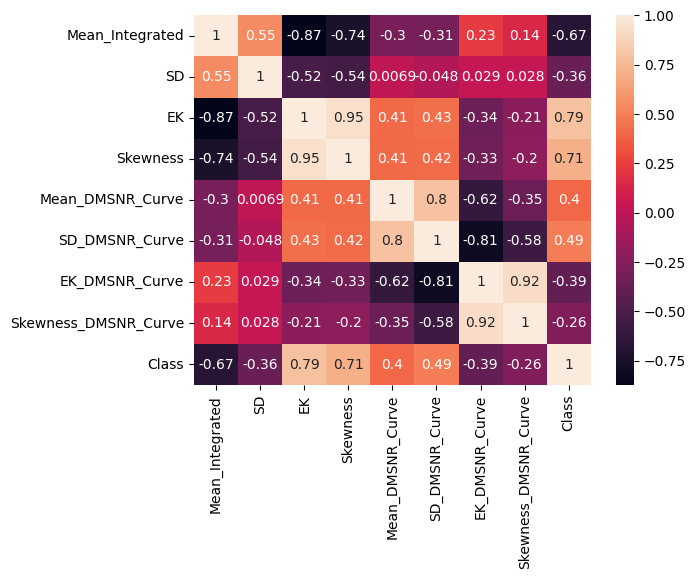

In [35]:
# Generating the heat map of the correlation of the columns of the dataset.
sns.heatmap(df.corr(),annot=True)

It may be observed that almost all the attributes are actually correlated with the prediction class. So, all the features have to be considered.
Alos, since there is only eight features, no dimensionality reduction is required.

In [36]:
#Splitting the dataset into attributes and label class.
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [37]:
#Scaling X values
sc=StandardScaler()
X=sc.fit_transform(X)

In [38]:
#Splitting the data into train data and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [39]:
#Fixing classifiers using a for loop
knn=KNeighborsClassifier()
sv=SVC(random_state=1)
gnb=GaussianNB()
dtc=DecisionTreeClassifier(criterion="entropy")
rfc=RandomForestClassifier(n_estimators=50,criterion="entropy",random_state=1)
abc=AdaBoostClassifier(random_state=1)
acc=[]
models=[knn,sv,gnb,dtc,rfc,abc]
for model in models:
  print(model.__class__.__name__)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("Accuracy:",accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  acc.append(accuracy_score(y_test,y_pred))
  print("*"*100)

KNeighborsClassifier
Accuracy: 0.9791433891992551
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4880
           1       0.93      0.84      0.88       490

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.93      5370
weighted avg       0.98      0.98      0.98      5370

****************************************************************************************************
SVC
Accuracy: 0.9795158286778398
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4880
           1       0.94      0.83      0.88       490

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

****************************************************************************************************
GaussianNB
Accuracy: 0.9437616387337058
              precisi

In [40]:
#Comparing the accuracy of the models and finding the highly accurate one.
accuracy_before_resampling=pd.DataFrame({"Model":["KNearestNeighbors","SVC","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier"],"Accuracy":acc})


In [41]:
#Creating a function for highlighting the cell with maximum accuracy
def highlight(x):
  if x==max(accuracy_before_resampling["Accuracy"]):
    return "background-color:blue;color:white;"
  else:
    return ""

In [42]:
#Comapring accuracies and finding the model with maximum accuracy using the 'highlight' function.
accuracy_before_resampling.style.applymap(highlight)

,Model,Accuracy
0,KNearestNeighbors,0.979143
1,SVC,0.979516
2,GaussianNB,0.943762
3,DecisionTreeClassifier,0.966108
4,RandomForestClassifier,0.979888
5,AdaBoostClassifier,0.979516


It is observed that the RandomForestClassifier gives the maximum accuracy.

In [43]:
#Hyper Tuning RandomForestClassifier
params= {'n_estimators': [30,40,50],'min_samples_split':[2,5,10],'max_features':[None,'sqrt'],'criterion':['entropy','log_loss'],'random_state':[1]}
clf=GridSearchCV(RandomForestClassifier(),params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': None, 'min_samples_split': 10, 'n_estimators': 30, 'random_state': 1}


In [44]:
#Evaluating the performance of the hyper tuned RandomForestClassifier
rfc=RandomForestClassifier(criterion="entropy",max_features=None,min_samples_split=10,n_estimators=30,random_state=1)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
acc_aht=accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9800744878957169
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4880
           1       0.93      0.85      0.89       490

    accuracy                           0.98      5370
   macro avg       0.96      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370



In [45]:
#Creating a function for highlighting the cell with maximum accuracy
def highlight(x):
  if x==max(accuracy_comparission.iloc[0]):
    return "background-color:blue;color:white;"
  else:
    return ""

In [46]:
#Comparing the accuracies of RandomForestClassifier models before and after hypertuning.
accuracy_comparission=pd.DataFrame([[accuracy_before_resampling.iloc[4,1],acc_aht]],columns=["Accuracy Before Hypertuning","Accuracy After Hypertuning"])
accuracy_comparission.style.applymap(highlight)

,Accuracy Before Hypertuning,Accuracy After Hypertuning
0,0.979888,0.980074


It is clear that the accuracy of the RandomForestClassifier model has increased, little a bit, after hypertuning.

In [47]:
#Updating the accuracy of the RandomForestClassifier model with that of the hypertuned model.
acc[4]=acc_aht

Now, we go for resampling.
Since the dataset is highly imbalanced, neigther over sampling nor under samling would give us a better result.
So, we go for the middle-line of the above preocedures. That is, doing both over sampling and under sampling.
We use SMOTEENN for this purpose.

In [48]:
#Resampling using SMOTEENN
sm=SMOTEENN(random_state=1)
X_train,y_train=sm.fit_resample(X_train,y_train)

In [49]:
#Fitting models to the resampled dataset and comparing the performance.
acc_rs=[]
for model in models:
  print(model.__class__.__name__)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  acc_rs.append(accuracy_score(y_test,y_pred))
  print("*"*100)

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      4880
           1       0.62      0.92      0.74       490

    accuracy                           0.94      5370
   macro avg       0.81      0.93      0.86      5370
weighted avg       0.96      0.94      0.95      5370

****************************************************************************************************
SVC
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4880
           1       0.77      0.92      0.84       490

    accuracy                           0.97      5370
   macro avg       0.88      0.95      0.91      5370
weighted avg       0.97      0.97      0.97      5370

****************************************************************************************************
GaussianNB
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      4880

In [50]:
#Comparing the accuracies of the models before and after resampling.
accuracy=pd.DataFrame({"Model":["KNearestNeighbors","SVC","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier"],"Accuracy Before Resampling":acc,"Accuracy After Resampling":acc_rs})
accuracy

,Model,Accuracy Before Resampling,Accuracy After Resampling
0,KNearestNeighbors,0.979143,0.941899
1,SVC,0.979516,0.968343
2,GaussianNB,0.943762,0.933333
3,DecisionTreeClassifier,0.966108,0.948045
4,RandomForestClassifier,0.980074,0.968529
5,AdaBoostClassifier,0.979516,0.956611


It is observed that the accuracy of the models has reduced after resampling.
Also, it may be concluded that the hyper tuned RandomForestClassifier performs better as compared to others, on the original dataset, with an accuracy of around 0.980074.